# Simple Linear regression (Multi-Variable)

# 1. Loading the data

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('advertising.csv')
data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# DATA ANALYSIS

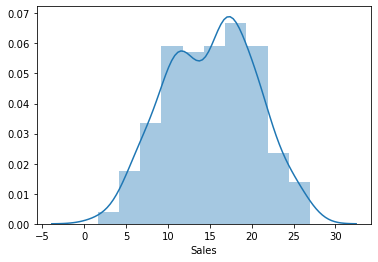

In [4]:
import seaborn as sns
sns.distplot(data.Sales)

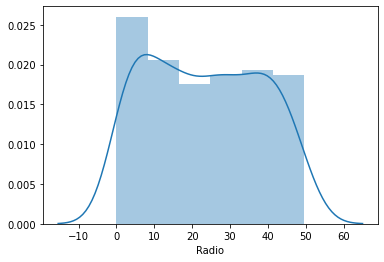

In [5]:
sns.distplot(data.Radio)

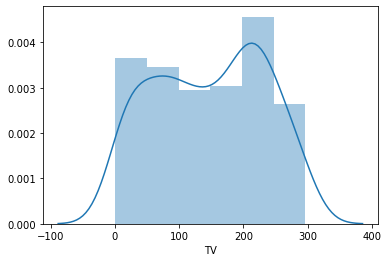

In [6]:
sns.distplot(data.TV)

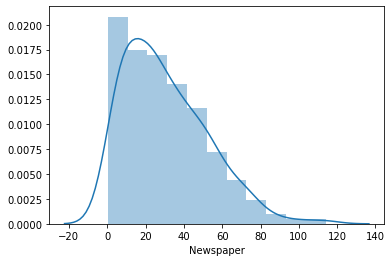

In [7]:

sns.distplot(data.Newspaper)

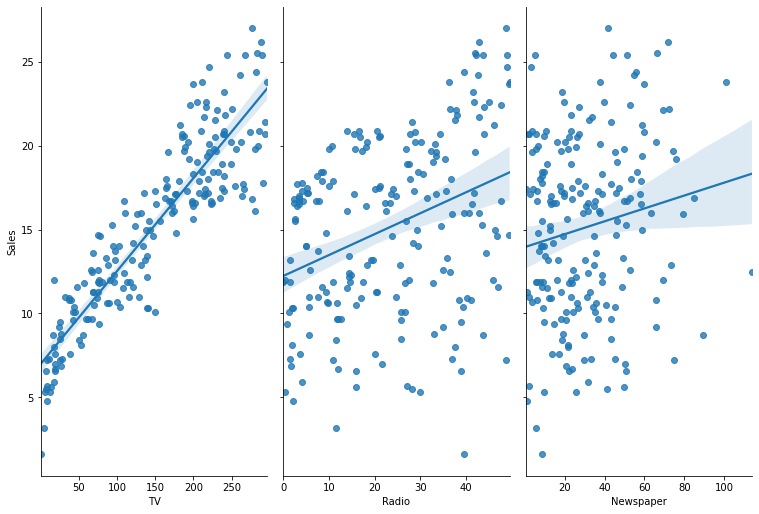

In [8]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',kind='reg',aspect=0.5,height=7)

In [9]:
data.TV.corr(data.Sales)

0.9012079133023305

In [10]:
data.Radio.corr(data.Sales)

0.34963109700766937

In [11]:
data.Newspaper.corr(data.Sales)

0.1579600261549263

In [12]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


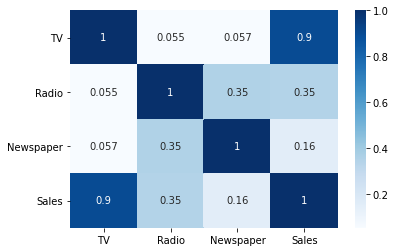

In [13]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

# Creating Model

In [14]:
x=data[['TV']]
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [15]:
x.shape

(200, 1)

In [16]:
y=data[['Sales']]
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [18]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(150, 1) (50, 1)
(150, 1) (50, 1)


In [19]:
x_train.head()

,TV
29,70.6
130,0.7
63,102.7
49,66.9
196,94.2


# Training

In [20]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(linear_reg.intercept_)
print(linear_reg.coef_)

[7.08596548]
[[0.05492784]]


# Making Predictions 

In [22]:
prediction = linear_reg.predict(x_test)

In [23]:
prediction[:10]

array([[18.65926215],
       [13.45759535],
       [10.24431649],
       [ 8.03072439],
       [10.35966497],
       [13.52350876],
       [11.22203211],
       [ 8.55803169],
       [18.99432199],
       [20.3620253 ]])

# Model Evaluation Metrics

We'll use MAE, MSE , RMSE for evaluation

In [24]:
from sklearn import metrics

In [25]:
metrics.mean_absolute_error(prediction,y_test)

1.8556182332019426

In [26]:
metrics.mean_squared_error(prediction,y_test)

5.242828085493569

In [27]:
print("RMSE")
np.sqrt(metrics.mean_squared_error(prediction,y_test))

RMSE


2.2897222725679134